# Clustering with and without Autoenconders

### Data comes from this [dataset](https://www.kaggle.com/arjunbhasin2013/ccdata) from kaggle.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow import keras

## Loading the dataset CC_GENERAL to a dataframe

In [2]:
path_to_data = os.getcwd().replace("\\", "/") + "/CC_GENERAL.csv"
credit_card_df = pd.read_csv(path_to_data)
credit_card_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Information about the Dataset columns

1. CUSTID: Identification of Credit Card holder 
2. BALANCE: Balance amount left in customer's account to make purchases
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES: Amount of purchases made from account
5. ONEOFFPURCHASES: Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment
7. CASH_ADVANCE: Cash in advance given by the user
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
12. CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
13. PURCHASES_TRX: Number of purchase transactions made
14. CREDIT_LIMIT: Limit of Credit Card for user
15. PAYMENTS: Amount of Payment done by user
16. MINIMUM_PAYMENTS: Minimum amount of payments made by user  
17. PRC_FULL_PAYMENT: Percent of full payment paid by user
18. TENURE: Tenure of credit card service for user

In [3]:
print(f"{credit_card_df.shape[1]} features with {credit_card_df.shape[0]} data points")

18 features with 8950 data points


## Checking for nan values on the dataframe

In [4]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Some statistics about the dataset

*BALANCE* mean is around 1500$, wich means most costumers left around 1500$ in their accounts to make purchases <br>
*BALANCE_FREQUENCY* mean is around 1, wich means most costumers update their balance frequently <br>
*PURCHASES* mean is around 1000$, wich means most costumers purchases are around 1000$ <br>
*ONEOFF_PURCHASES* mean is around 600$, wich means most costumers one off purchase is around 600$ <br>
*INSTALLMENTS_PURCHASES* mean is around 400$, wich means most costumers spend 400$ in installments <br>
*CASH_ADVANCE* mean is around 1000$, wich means most costumers give 1000$ in advance <br>
*PURCHASES_FREQUENCY* mean is around 0.5, wich means most costumers purchases frequency are not frequent but are not frenquently as well <br>
the means of *ONEOFF_PURCHASES_FREQUENCY*, *PURCHASES_INSTALLMENTS_FREQUENCY*, *CASH_ADVANCE_FREQUENCY* are low, wich means most costumers dont do one off the purchases <br>
*CREDIT_LIMIT* mean is around 4500$, wich means most costumers have 4500$ has their credit card limit <br>
*PRC_FULL_PAYMENT* mean is around 15%, wich means most costumers have paid 15% of the full payment they need to make <br>
*TENURE* mean is around 11.5 years, wich means most costumers repayment period is around 11.5 years <br>

In [5]:
credit_card_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Explore the Dataset

### How many missing values

In [6]:
null_series = credit_card_df.isnull().sum()
print(null_series[null_series > 0])

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64


### Fill up the missing values from CREDIT_LIMIT and MINIMUM_PAYMENTS with the respective mean

In [7]:
credit_card_df.loc[(credit_card_df["CREDIT_LIMIT"].isnull() == True), "CREDIT_LIMIT"] = credit_card_df["CREDIT_LIMIT"].mean()

In [8]:
credit_card_df.loc[(credit_card_df["MINIMUM_PAYMENTS"].isnull() == True), "MINIMUM_PAYMENTS"] = credit_card_df["MINIMUM_PAYMENTS"].mean()

### As we can see, no missing values now

In [9]:
credit_card_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### For clustering, knowing the costumer id is not necessary so we are going to drop the column

In [10]:
# drop column CUST_ID, axis = 1 because it is a column and not a row, and inplace = True so it applies the changed directly to the dataframe
credit_card_df.drop("CUST_ID", axis = 1, inplace = True)

In [11]:
credit_card_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Ploting columns histograms to try and make some conclusions

PURCHASES_FREQUENCY have two distint groups of costumers <br>


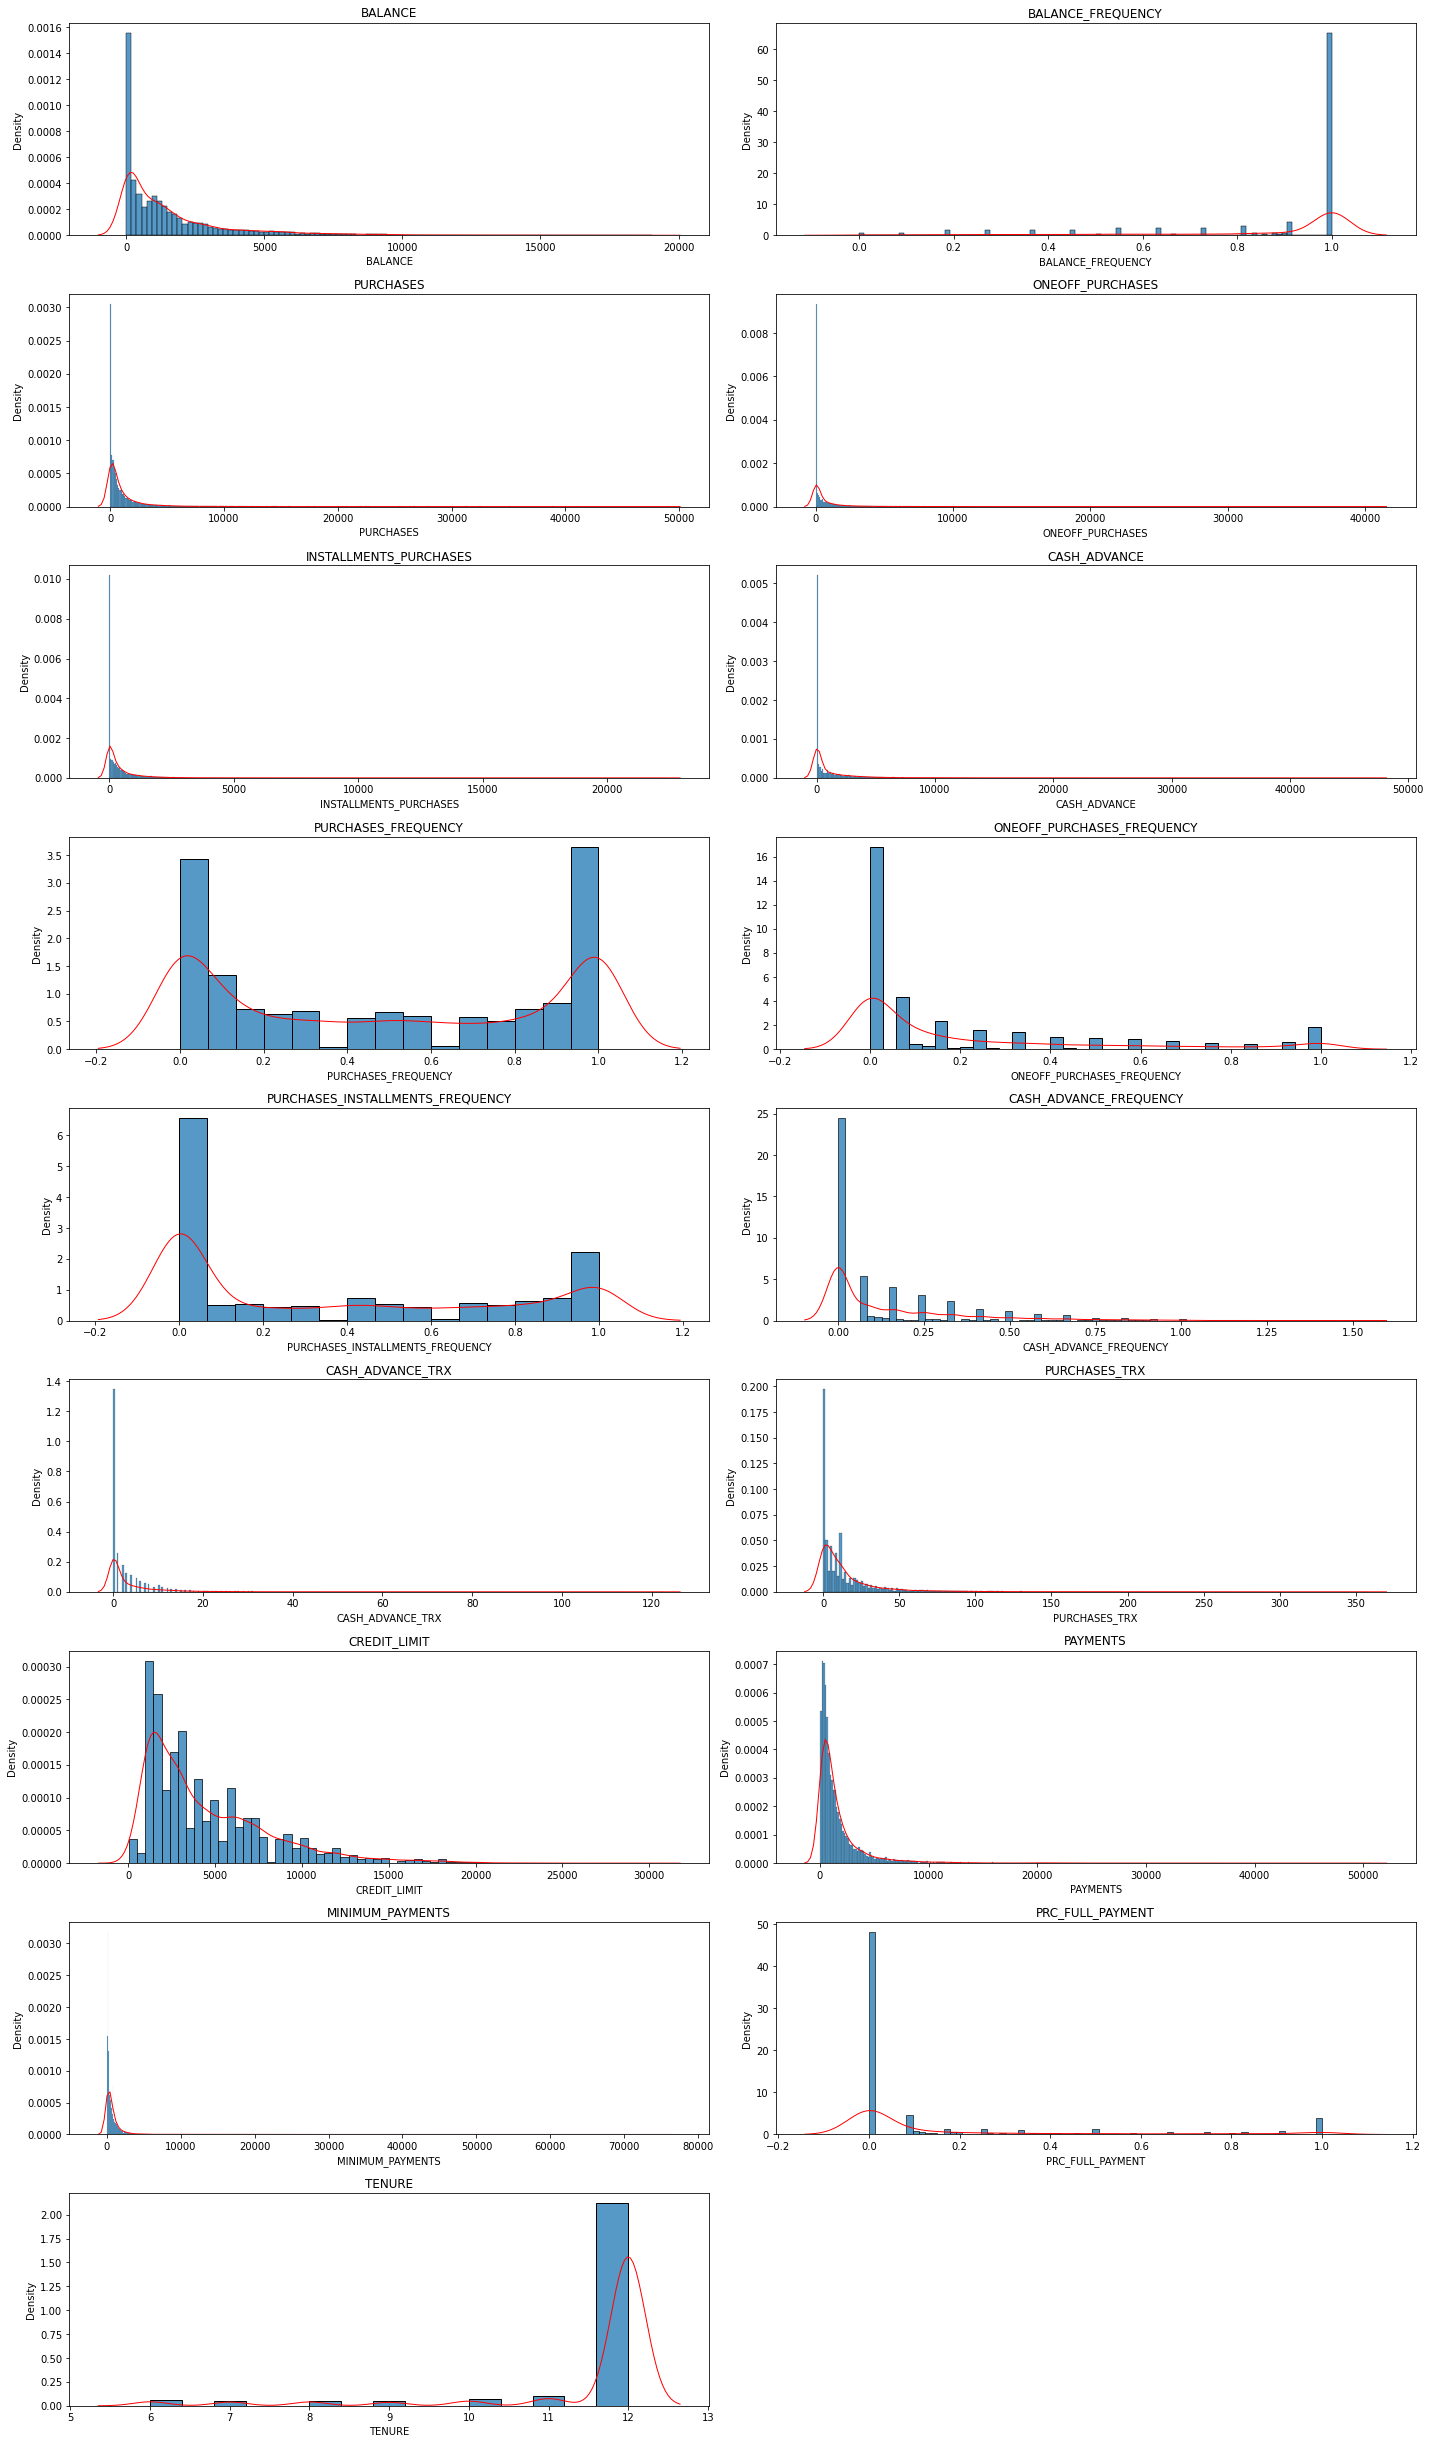

In [40]:
plt.figure(figsize=(20, 60))

for i in range(len(credit_card_df.columns)):
    plt.subplot(16, 2, i + 1)
    sns.histplot(credit_card_df.iloc[:, i], stat="density")
    sns.kdeplot(credit_card_df.iloc[:, i], color="r", lw=1)
    plt.title(credit_card_df.columns[i])

plt.tight_layout()

## Clustering

### K-means:
- is an unsupervised learning algorithm (clustering)
- works by grouping some data points together (clustering) in an unsupervised fashion
- The algorithm groups observations with similiar attribute values together by measuring the Euclidian distance between points

### K-means algorithm steps:
1. Choose number of clusters "K"
2. Select random K points that are going to be the centroids for each cluster
3. Assign each data point to the nearest centroid, doind so will enable us to create "K" number of clusters
4. Calculate a new centroid for each cluster
5. Reassign each data point to the new closest centroid
6. Go to step 4 and repeat

### "Elbow method" to select the optimal number of clusters (K):
- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best

## First let´s slace the data

In [41]:
scaler = StandardScaler()
credit_card_df_scaled = scaler.fit_transform(credit_card_df)

In [42]:
credit_card_df_scaled.shape

(8950, 17)

## Find the right number of clusters first

In [48]:
scores_K = []
possible_K_values = np.arange(1, 21)

for possible_K in possible_K_values:
    kmeans = KMeans(n_clusters= possible_K)
    kmeans.fit(credit_card_df_scaled)
    scores_K.append(kmeans.inertia_)

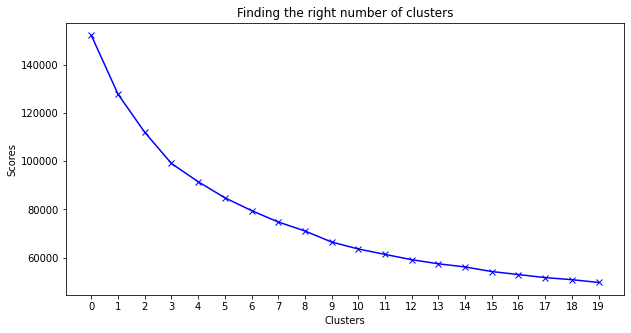

In [51]:
plt.figure(figsize = (10, 5))
plt.plot(scores_K, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.xticks(np.arange(0, 20, 1))
plt.show()